In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [117]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [118]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [119]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [120]:
df.shape

(28242, 7)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [122]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [123]:
df.duplicated().sum()

np.int64(2310)

In [124]:
# Show Duplicate values:
df[df.duplicated()]

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2083,Bangladesh,Maize,1990,10015,2666.0,1266.00,25.98
2085,Bangladesh,Potatoes,1990,91410,2666.0,1266.00,25.98
2087,Bangladesh,"Rice, paddy",1990,25661,2666.0,1266.00,25.98
2089,Bangladesh,Sorghum,1990,8103,2666.0,1266.00,25.98
2091,Bangladesh,Sweet potatoes,1990,98316,2666.0,1266.00,25.98
...,...,...,...,...,...,...,...
27690,United Kingdom,Wheat,2011,77471,1220.0,16401.66,10.63
27695,United Kingdom,Potatoes,2012,305570,1220.0,17718.64,9.55
27700,United Kingdom,Wheat,2012,66571,1220.0,17718.64,9.55
27705,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,9.57


In [125]:
df.drop_duplicates(inplace=True)

In [126]:
df.duplicated().sum()

np.int64(0)

In [127]:
df.shape

(25932, 7)

In [128]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [129]:
# Show corr only numerical columns
df.select_dtypes(include=[np.number]).corr()
df[df.columns[2:]].corr() # Same as above

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


<Axes: >

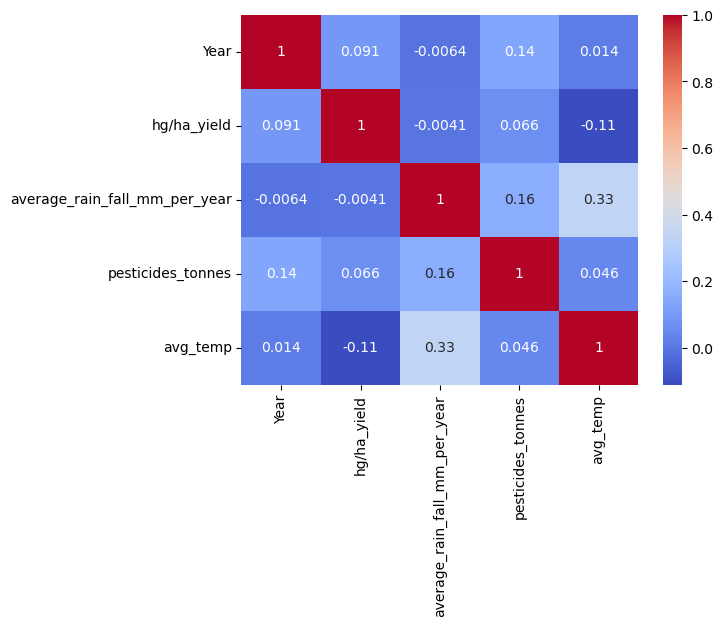

In [130]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')

In [131]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


<Axes: title={'center': 'Average Rainfall Distribution'}, ylabel='Frequency'>

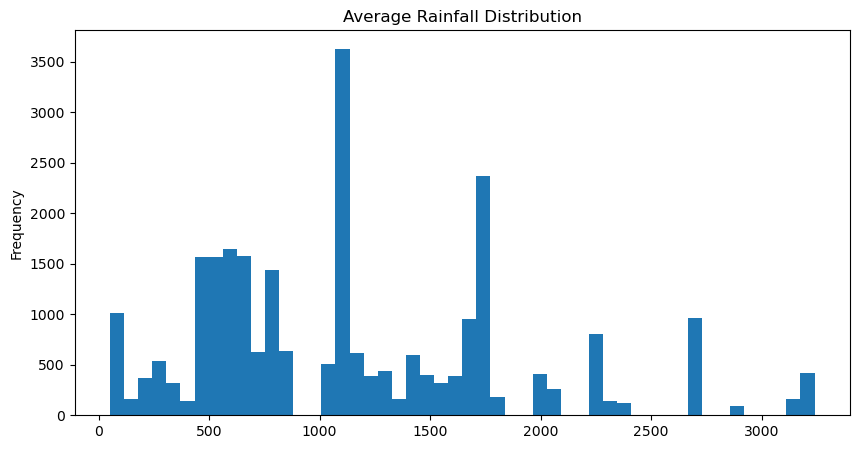

In [132]:
df['average_rain_fall_mm_per_year'].plot(kind='hist', bins=50, figsize=(10, 5), title='Average Rainfall Distribution')

In [133]:
df['average_rain_fall_mm_per_year'].dtype

dtype('float64')

In [134]:
df['average_rain_fall_mm_per_year'].value_counts().sum()

np.int64(25932)

In [135]:
# In df['average_rain_fall_mm_per_year'] column, some values has string data type. Check this:
df['average_rain_fall_mm_per_year'].apply(lambda x: isinstance(x, str)).value_counts() 

average_rain_fall_mm_per_year
False    25932
Name: count, dtype: int64

- All the values are numeric df['average_rain_fall_mm_per_year']

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


<Axes: xlabel='count', ylabel='Area'>

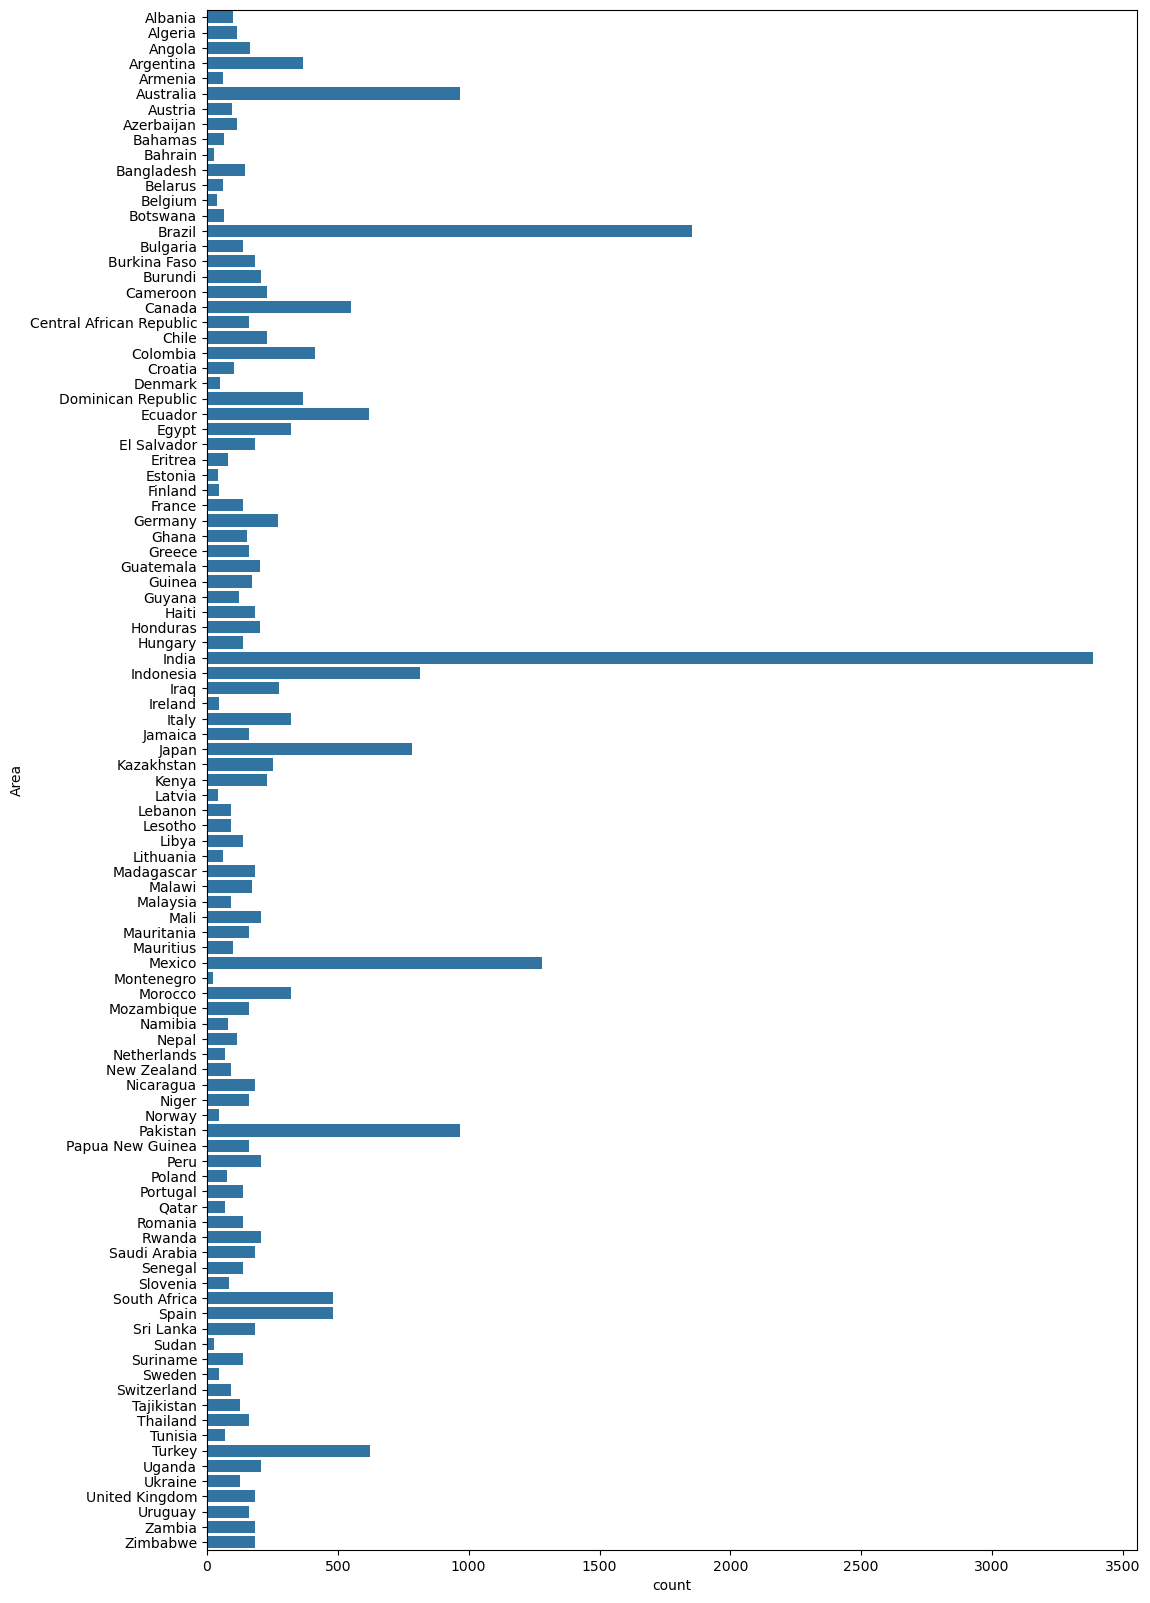

In [137]:
plt.figure(figsize=(12, 20))
sns.countplot(data= df, y='Area')

In [138]:
len(df['Area'])
country = df['Area'].unique()
country

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [139]:
for state in country:
    print(f"{state} : {len(df[df['Area'] == state])}")

Albania : 99
Algeria : 114
Angola : 164
Argentina : 368
Armenia : 63
Australia : 966
Austria : 96
Azerbaijan : 116
Bahamas : 67
Bahrain : 29
Bangladesh : 147
Belarus : 63
Belgium : 39
Botswana : 64
Brazil : 1854
Bulgaria : 138
Burkina Faso : 184
Burundi : 207
Cameroon : 230
Canada : 552
Central African Republic : 161
Chile : 230
Colombia : 414
Croatia : 105
Denmark : 50
Dominican Republic : 368
Ecuador : 621
Egypt : 322
El Salvador : 184
Eritrea : 80
Estonia : 42
Finland : 46
France : 138
Germany : 270
Ghana : 155
Greece : 161


Guatemala : 204
Guinea : 171
Guyana : 124
Haiti : 184
Honduras : 204
Hungary : 138
India : 3384
Indonesia : 816
Iraq : 276
Ireland : 46
Italy : 322
Jamaica : 161
Japan : 784
Kazakhstan : 252
Kenya : 230
Latvia : 42
Lebanon : 92
Lesotho : 92
Libya : 138
Lithuania : 63
Madagascar : 184
Malawi : 171
Malaysia : 93
Mali : 207
Mauritania : 161
Mauritius : 101
Mexico : 1280
Montenegro : 24
Morocco : 322
Mozambique : 161
Namibia : 82
Nepal : 115
Netherlands : 69
New Zealand : 92
Nicaragua : 183
Niger : 161
Norway : 46
Pakistan : 966
Papua New Guinea : 161
Peru : 207
Poland : 78
Portugal : 138
Qatar : 69
Romania : 138
Rwanda : 207
Saudi Arabia : 184
Senegal : 138
Slovenia : 84
South Africa : 483
Spain : 483
Sri Lanka : 184
Sudan : 28
Suriname : 138
Sweden : 46
Switzerland : 92
Tajikistan : 125
Thailand : 161
Tunisia : 69
Turkey : 625
Uganda : 207
Ukraine : 126
United Kingdom : 184
Uruguay : 161
Zambia : 184
Zimbabwe : 184


In [140]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [141]:
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [142]:
yield_per_country

[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(7720159),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(136340329),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(274219558),
 np.int64(68067328),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(10092

Text(0, 0.5, 'Country')

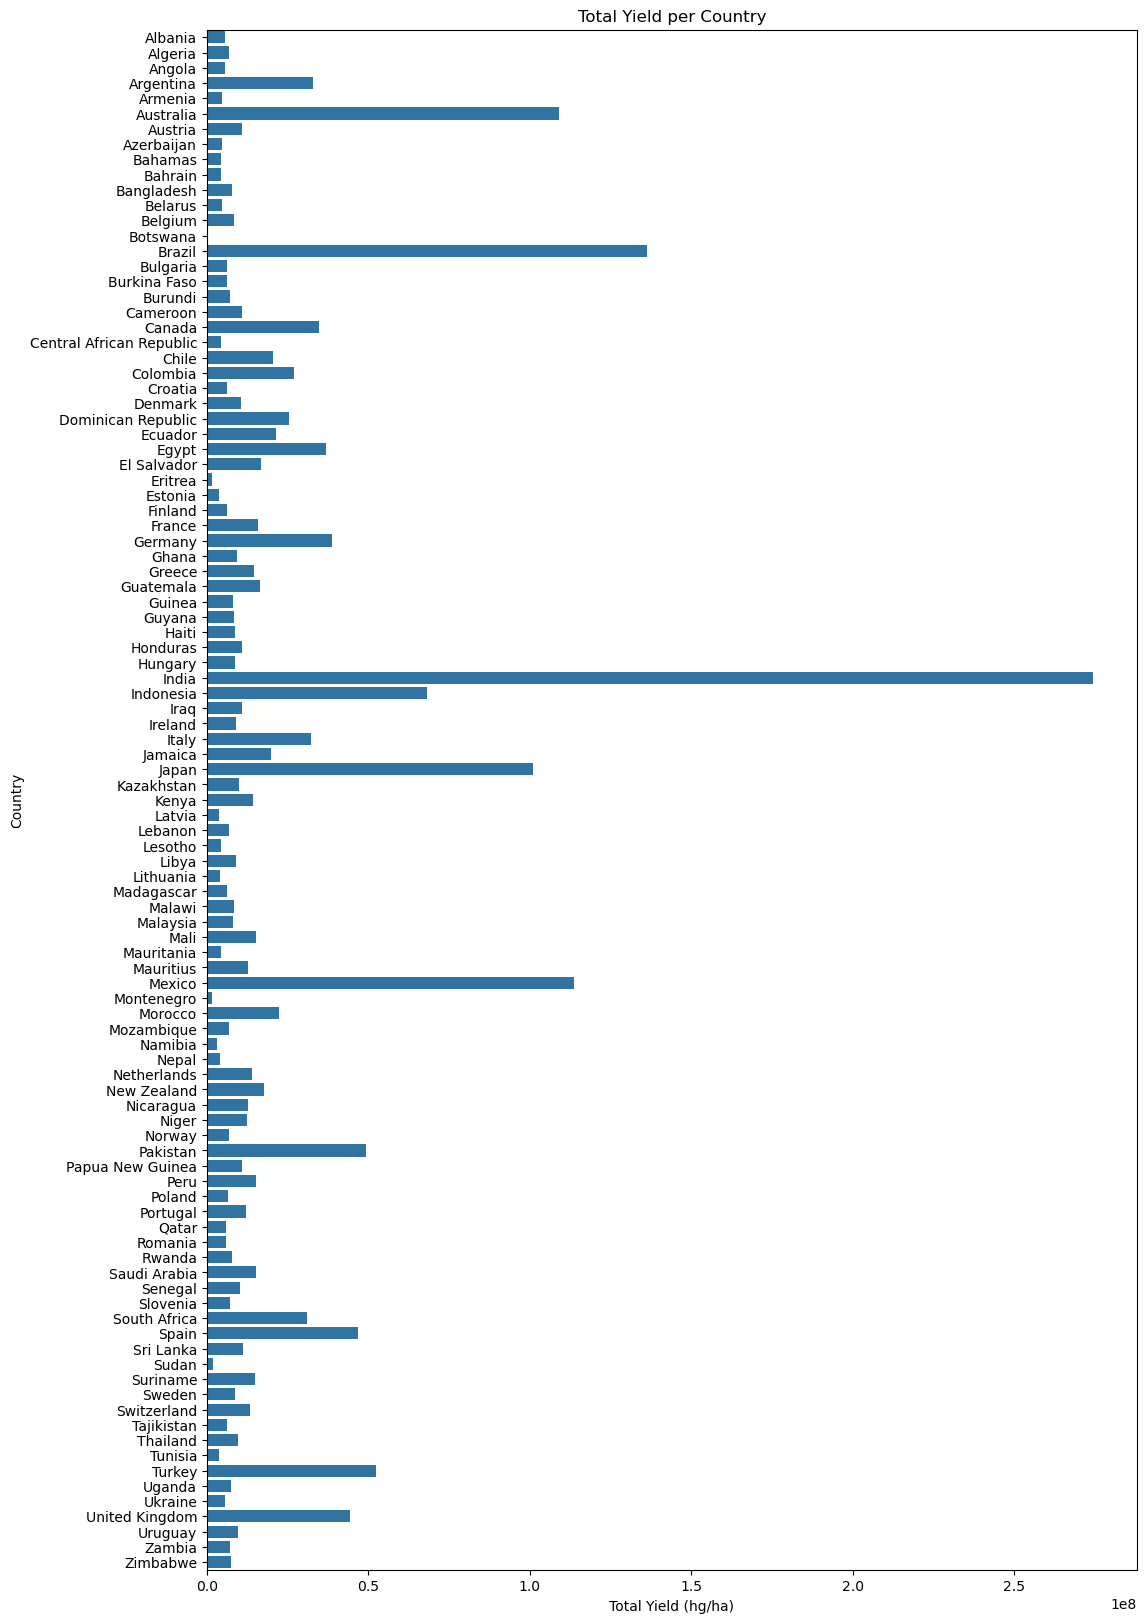

In [143]:
plt.figure(figsize=(12, 20))
sns.barplot(x=yield_per_country, y=country)
plt.title('Total Yield per Country')
plt.xlabel('Total Yield (hg/ha)')
plt.ylabel('Country')

In [144]:
crops = df['Item'].unique()
crops

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [145]:
for crop in crops:
    print(f"{crop} : {len(df[df['Item'] == crop])}")

Maize : 3824
Potatoes : 3956
Rice, paddy : 3091
Sorghum : 2770
Soybeans : 2940
Wheat : 3539
Cassava : 1889
Sweet potatoes : 2593
Plantains and others : 556
Yams : 774


In [146]:
# Yield per item:
yield_per_item = []
for crop in crops:
    yield_per_item.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

In [147]:
yield_per_item

[np.int64(142020761),
 np.int64(785921609),
 np.int64(127646024),
 np.int64(52906376),
 np.int64(49957039),
 np.int64(106614786),
 np.int64(275132269),
 np.int64(310269345),
 np.int64(58958974),
 np.int64(86769760)]

Text(0, 0.5, 'Item')

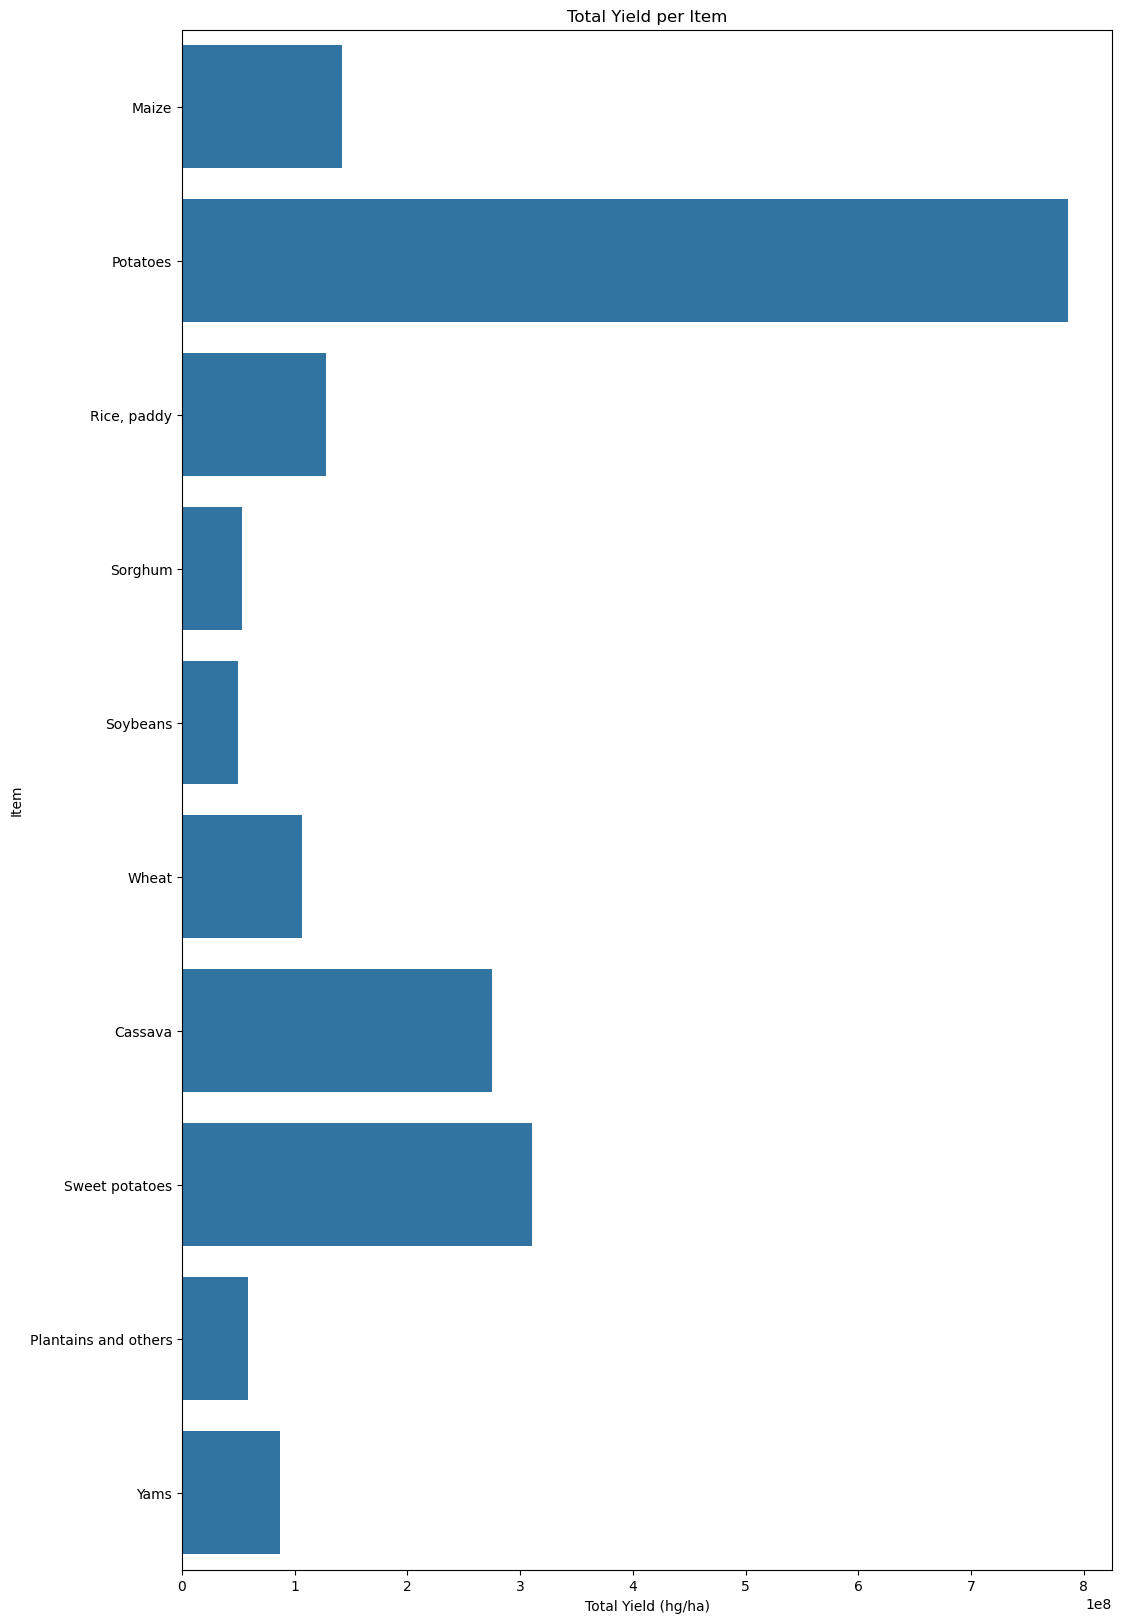

In [148]:
plt.figure(figsize=(12, 20))
sns.barplot(x=yield_per_item, y=crops)
plt.title('Total Yield per Item')
plt.xlabel('Total Yield (hg/ha)')
plt.ylabel('Item')

In [149]:
# Train Test Split:
X = df.drop(columns=['hg/ha_yield'])
Y = df['hg/ha_yield']

In [150]:
X.shape, Y.shape

((25932, 6), (25932,))

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20745, 6), (5187, 6), (20745,), (5187,))

In [153]:
X_train.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82
6793,Colombia,Maize,2006,3240.0,98328.63,27.51
28212,Zimbabwe,Potatoes,2010,657.0,3305.17,21.17
7358,Dominican Republic,Sweet potatoes,2007,1410.0,5689.80,27.08


In [154]:
# Convert Categorical Variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [155]:
ohe = OneHotEncoder(drop='first')   # drop first means that we drop the first category to avoid multicollinearity
scaler = StandardScaler()   # use StandardScaler to standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder', ohe, ['Item', 'Area']),
        ('standardscaler', scaler, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
    ],
    remainder='passthrough' # leave the rest of the columns unchanged
)

In [165]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 ['Item', 'Area']),
                                ('standardscaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [157]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [158]:
X_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

In [159]:
# Training the model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [160]:
models = {
    'lr' : LinearRegression(),
    'lasso': Lasso(),
    'ridge' : Ridge(),
    'KNN' : KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
}

In [161]:
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29920.734644779208 score : 0.7486566767053262
lasso : mae : 29907.600634911465 score : 0.7485829668817283
ridge : mae : 29875.427645641634 score : 0.7485419317783537
KNN : mae : 4854.222325043377 score : 0.9824139991265859
DTR : mae : 4146.712743396954 score : 0.9768288911046688


In [162]:
# Select the model:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 128507.],
      shape=(5187,))

In [163]:
features = np.array(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])
features

array(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item'], dtype='<U29')

In [181]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame with the same column names and order as training data
    features_df = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features_df)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

In [182]:
df.sample()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28072,Zimbabwe,Sweet potatoes,1991,21429,657.0,6753.0,20.95


In [183]:
prediction(2006, 1712.0, 1751.75, 26.56, 'Sri Lanka', 'Soybeans')

np.float64(16873.0)

In [184]:
result

np.float64(36613.0)

In [177]:
# Pickle files:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))